In [1]:
import numpy as np
from pandas import DataFrame

point = np.array([
    [25,25],
    [25,15],
    [30,40],
    [40,40],
    [45,25],
    [55,40],
    [60,75],
    [70,80],
    [70,55],
    [80,45],
    [80,90],
    [85,70]])

# data assignment
xCoord = (point[:,0])
yCoord = (point[:,1])
print(xCoord)
print(yCoord)

[25 25 30 40 45 55 60 70 70 80 80 85]
[25 15 40 40 25 40 75 80 55 45 90 70]


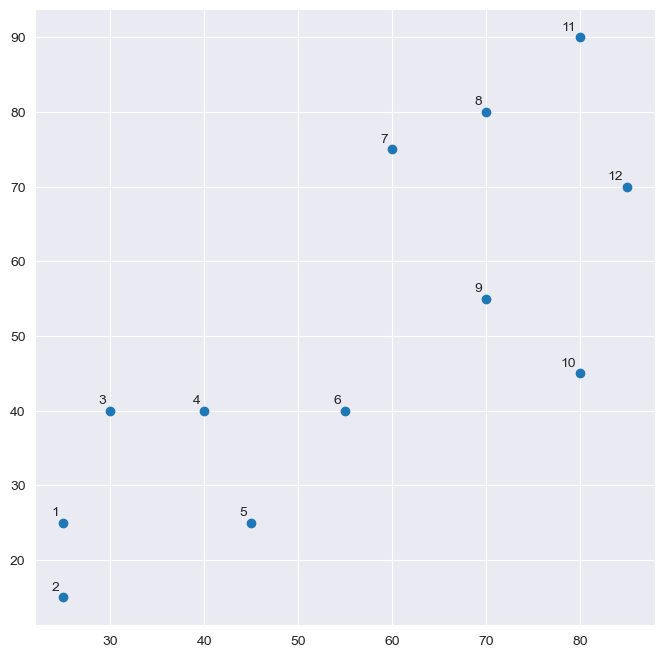

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

labels = range(1, (len(point)+1))
plt.figure(figsize=(8, 8))

#[:,0] for two dimensional arrays gives all values in column 0
plt.scatter(point[:,0],point[:,1], label='True Position')

#an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc
for label, x, y in zip(labels, point[:, 0], point[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

#draws the data points in the X numpy array and label data points from 1 to n.

[[74.16666667 69.16666667]
 [36.66666667 30.83333333]]


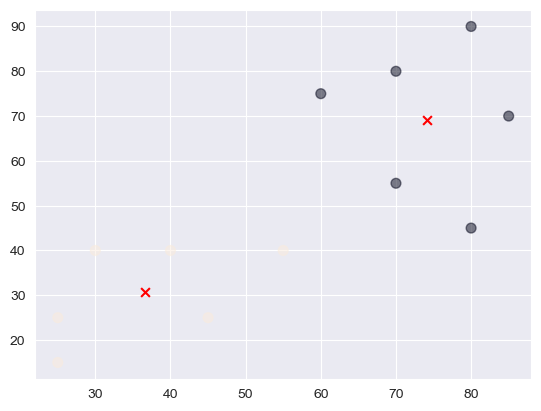

In [3]:
#df = DataFrame(Data,columns=['x','y'])
# set number of clusters k
k = 2
kmeans = KMeans(n_clusters=k).fit(point)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(point[:,0], point[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.show()

[[74.16666667 69.16666667]
 [36.66666667 30.83333333]]


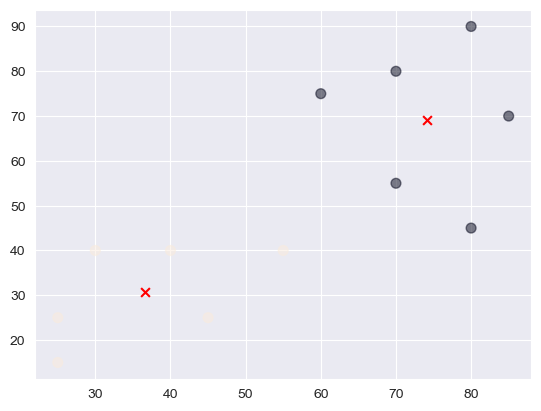

In [4]:
k = 2
#kmeans = KMeans(n_clusters=k).fit(point)
kmeans = KMeans(n_clusters = k, init = 'k-means++').fit(point)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(point[:,0], point[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.show()


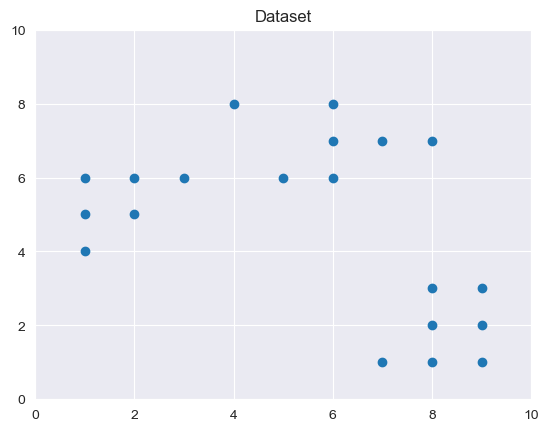

In [5]:
# Elbow method

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Run the Kmeans algorithm and get the index of data points clusters
# SSE is the Sum of Squared Errors
sse = []
x1 = np.array([1, 1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 7, 7, 8, 8, 8, 8, 9, 9, 9])
x2 = np.array([4, 5, 6, 5, 6, 6, 8, 6, 8, 6, 7, 1, 7, 1, 3, 7, 2, 1, 3, 2])
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()


C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of squared distance')

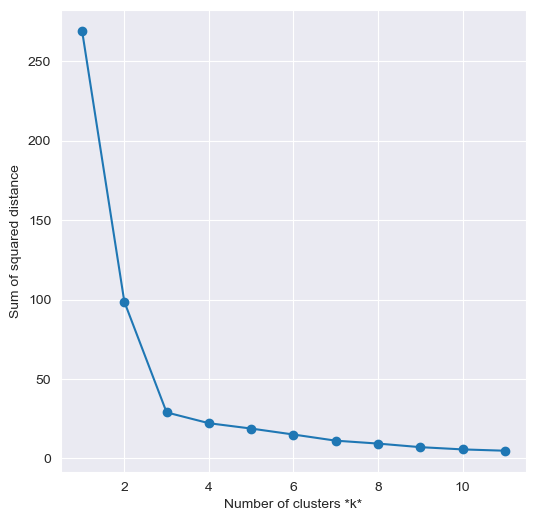

In [6]:
X = np.stack((x1, x2), axis=-1)

# k_list is the list of range in between we want to find clusters for
k_list = list(range(1, 12))

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k)
    
    # fitting the data (X is the data set) to km_model
    km_model.fit(X)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.figure(figsize=(6, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')